## Machine Learnning - Previsão banco de dados de Câncer

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['feature_names', 'target_names', 'data', 'DESCR', 'target'])


In [4]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
print(cancer.data)

[[  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02 ...,   1.86000000e-01
    2.75000000e-01   8.90200000e-02]
 [  1.96900000e+01   2.12500000e+01   1.30000000e+02 ...,   2.43000000e-01
    3.61300000e-01   8.75800000e-02]
 ..., 
 [  1.66000000e+01   2.80800000e+01   1.08300000e+02 ...,   1.41800000e-01
    2.21800000e-01   7.82000000e-02]
 [  2.06000000e+01   2.93300000e+01   1.40100000e+02 ...,   2.65000000e-01
    4.08700000e-01   1.24000000e-01]
 [  7.76000000e+00   2.45400000e+01   4.79200000e+01 ...,   0.00000000e+00
    2.87100000e-01   7.03900000e-02]]


In [6]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [7]:
print(cancer.target_names)

['malignant' 'benign']


In [20]:
X = cancer.data
y = cancer.target

In [21]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
knm = KNeighborsClassifier(n_neighbors=1)
knm.fit(X, y)
y_pred = knm.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


In [40]:
from sklearn.neighbors import KNeighborsClassifier
knm = KNeighborsClassifier(n_neighbors=5)
knm.fit(X, y)
y_pred = knm.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.947275922671


In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
logreg.predict(X)
y_pred = logreg.predict(X)
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.959578207381


In [43]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

C:\DataSize\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [48]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.907894736842


In [47]:
knm = KNeighborsClassifier(n_neighbors=5)
knm.fit(X_train, y_train)
y_pred = knm.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.907894736842


In [49]:
knm = KNeighborsClassifier(n_neighbors=1)
knm.fit(X_train, y_train)
y_pred = knm.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.90350877193


In [50]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knm = KNeighborsClassifier(n_neighbors=k)
    knm.fit(X_train, y_train)
    y_pred = knm.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [51]:
print(scores)

[0.90350877192982459, 0.8728070175438597, 0.91666666666666663, 0.90350877192982459, 0.90789473684210531, 0.91228070175438591, 0.91666666666666663, 0.91666666666666663, 0.91666666666666663, 0.91228070175438591, 0.91228070175438591, 0.90789473684210531, 0.91228070175438591, 0.90789473684210531, 0.91228070175438591, 0.90789473684210531, 0.90789473684210531, 0.89912280701754388, 0.89912280701754388, 0.90350877192982459, 0.89473684210526316, 0.89473684210526316, 0.89473684210526316, 0.89473684210526316, 0.89473684210526316]


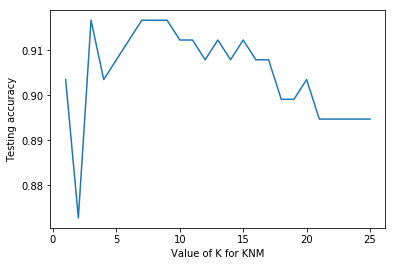

In [52]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel("Value of K for KNM")
plt.ylabel("Testing accuracy")

## RESPOSTAS

## 1) Test entire model: 

## knm(1) -> 100%
## knm(5) -> 94,73%
## LogReg -> 95,96%

## 2) Train/test Split:

##  knm(1) -> 90,35%
## knm(5) -> 90,79%
## LogReg - > 90,79%

## 3) Gráfico de Tunning knm (1-25)

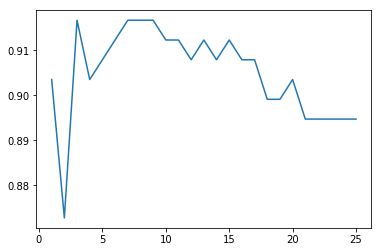

In [56]:
plt.plot(k_range, scores)

## 4) Qual o melhor modelo com a melhor acurácia?

## Knm(3)